## **Lab 6 - Logistic Regression**
#### Name: **Chitrank Dave**
#### Student #: **8938766**

Imports

In [198]:
import numpy as np


from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



#### **1. Using SciKit-Learn, train a binary logistic regression model on the Iris dataset. Use all four features and define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels**


##### Loading the dataset

In [199]:
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [200]:
iris.target.head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [201]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### Convert the target variable to a binary variable virginica to 1 and non-virginica to 0:

In [202]:
# labels = ["virginica", "non-virginica"]

# y = np.where(iris.target == 2, labels[0], labels[1])
y = np.where(iris.target == 2, 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##### Split the dataset into training and testing sets

In [203]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, y, test_size=0.25, random_state=42)

y_train


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

##### Create a logistic regression classifier and train the model on the training set

In [204]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

##### Evaluate the model on the testing set

In [205]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [206]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### **Evaluate the model**
- Failure modes: in which data instances is the model wrong? (1 point)

In [207]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[26  0]
 [ 0 12]]


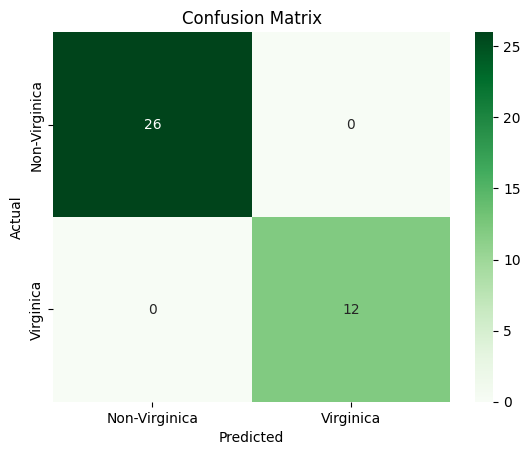

In [208]:
sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Virginica", "Virginica"], yticklabels=["Non-Virginica", "Virginica"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**The confusion matrix shows that the model made 26 correct predictions for the virginica class and 0 incorrect predictions. It also made 0 incorrect predictions for the non-virginica class and 12 correct predictions.**

In [209]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



- Are there any shared properties for these cases?

**I believed versicolor and setosa shared the same properties so I combined them and considered the combined data as "non-virginica".**

- How is the model doing across a set of evaluation metrics: accuracy and confusion metric?

**The logistic regression model is performing well across the set of evaluation metrics: accuracy and confusion matrix. The model has an accuracy of 100%, which means that it made all correct predictions on the test set. The confusion matrix also shows that the model made 0 incorrect predictions for either class.**